<a href="https://colab.research.google.com/github/rumeysk/Practice-Codes/blob/main/Titanik_Veri_Seti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Titanik Data Setinin İncelenmesi

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns


In [ ]:
df = sns.load_dataset("titanic")


In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.shape

(891, 15)

In [ ]:
df.mean(numeric_only=True)

,0
survived,0.383838
pclass,2.308642
age,29.699118
sibsp,0.523008
parch,0.381594
fare,32.204208
adult_male,0.602694
alone,0.602694


In [ ]:
df.describe(include=['O'])

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


## "pclass" kısmında hayatta kalma oranı

In [ ]:
pclass_survived = df.groupby('pclass').survived.value_counts()
pclass_survived

pclass  survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

<Axes: xlabel='survived'>

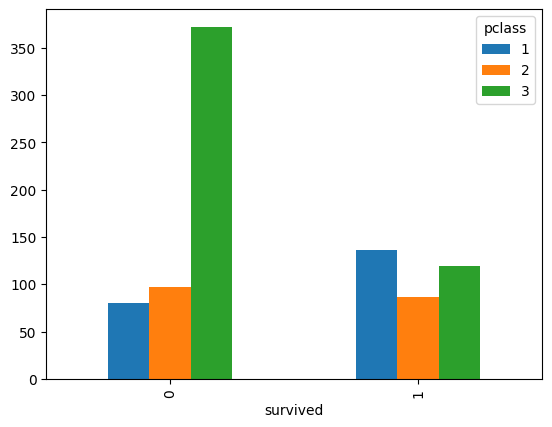

In [ ]:
pclass_survived.unstack(level=0).plot(kind='bar', subplots=False)

In [ ]:
pclass_survived_average = df[['pclass', 'survived']].groupby(['pclass'], as_index=False).mean()
pclass_survived_average

,pclass,survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<Axes: >

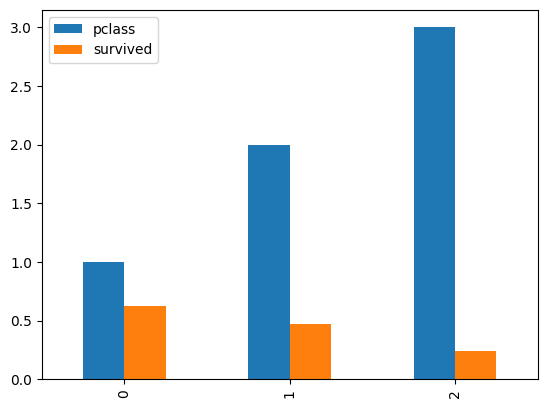

In [ ]:
pclass_survived_average.plot(kind='bar', subplots=False)


<Axes: xlabel='pclass', ylabel='survived'>

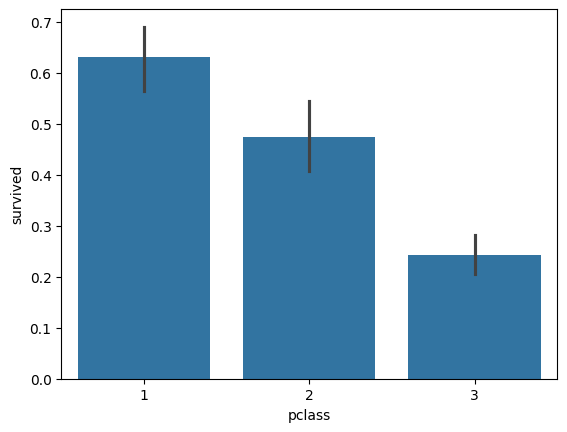

In [ ]:
sns.barplot(x='pclass', y='survived', data=df)

##"sex" kısmında hayatta kalma oranı

In [ ]:
df.sex.value_counts()

,count
sex,
male,577
female,314


In [ ]:
sex_survival = df.groupby('sex').survived.value_counts()
sex_survival

sex     survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

<Axes: xlabel='survived'>

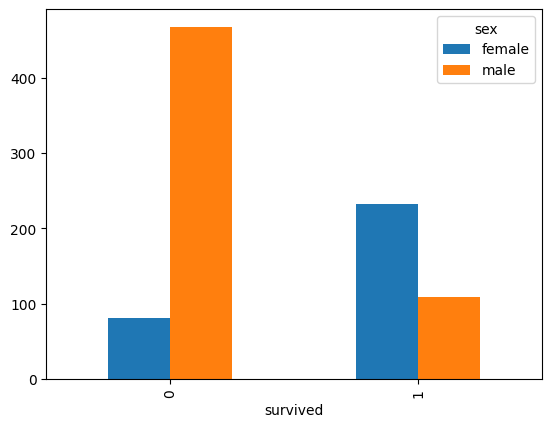

In [ ]:
sex_survival.unstack(level=0).plot(kind='bar', subplots=False)

In [ ]:
sex_survived_average = df[['sex', 'survived']].groupby(['sex'], as_index=False).mean()
sex_survived_average


,sex,survived
0,female,0.742038
1,male,0.188908


array([<Axes: title={'center': 'survived'}>], dtype=object)

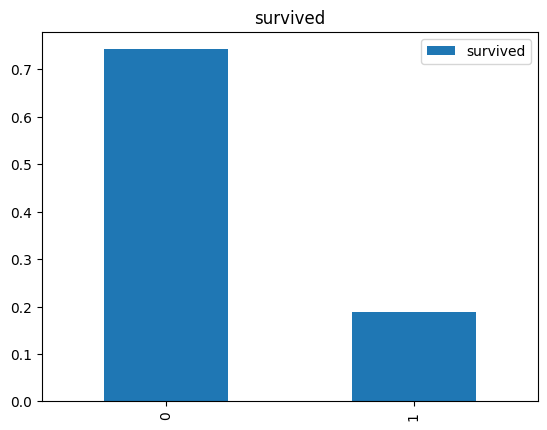

In [ ]:
sex_survived_average.plot(kind='bar', subplots=True)


<Axes: xlabel='sex', ylabel='survived'>

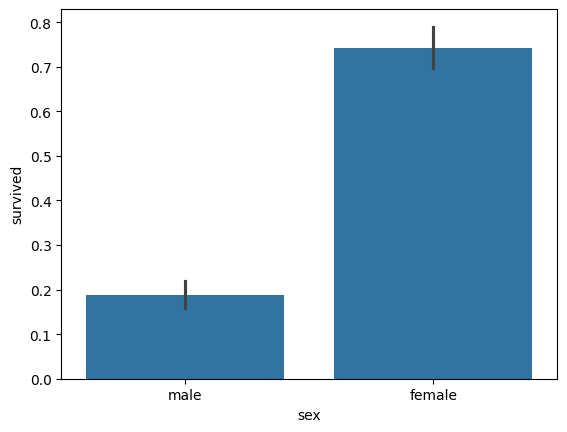

In [ ]:
sns.barplot(x='sex', y='survived', data=df)

##"pclass" ile "sex" kısımları arasında hayatta kalma oranı

In [ ]:
tab = pd.crosstab(df['pclass'], df['sex'])
tab

sex,female,male
pclass,,
1,94,122
2,76,108
3,144,347


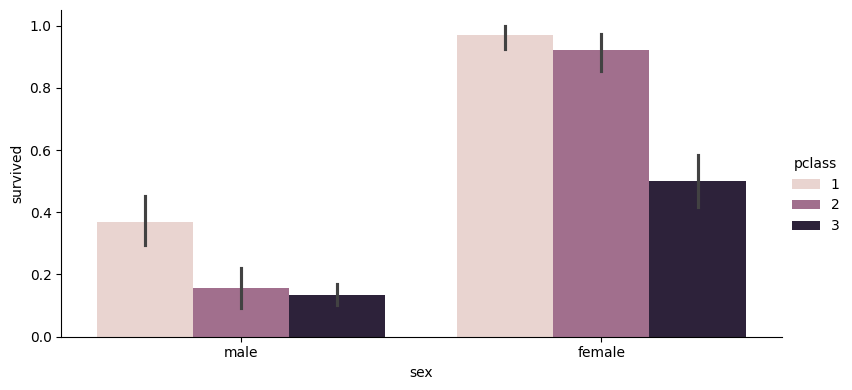

In [ ]:
sns.catplot(x='sex', y='survived', hue='pclass',kind = 'bar' ,height=4, aspect=2, data=df)

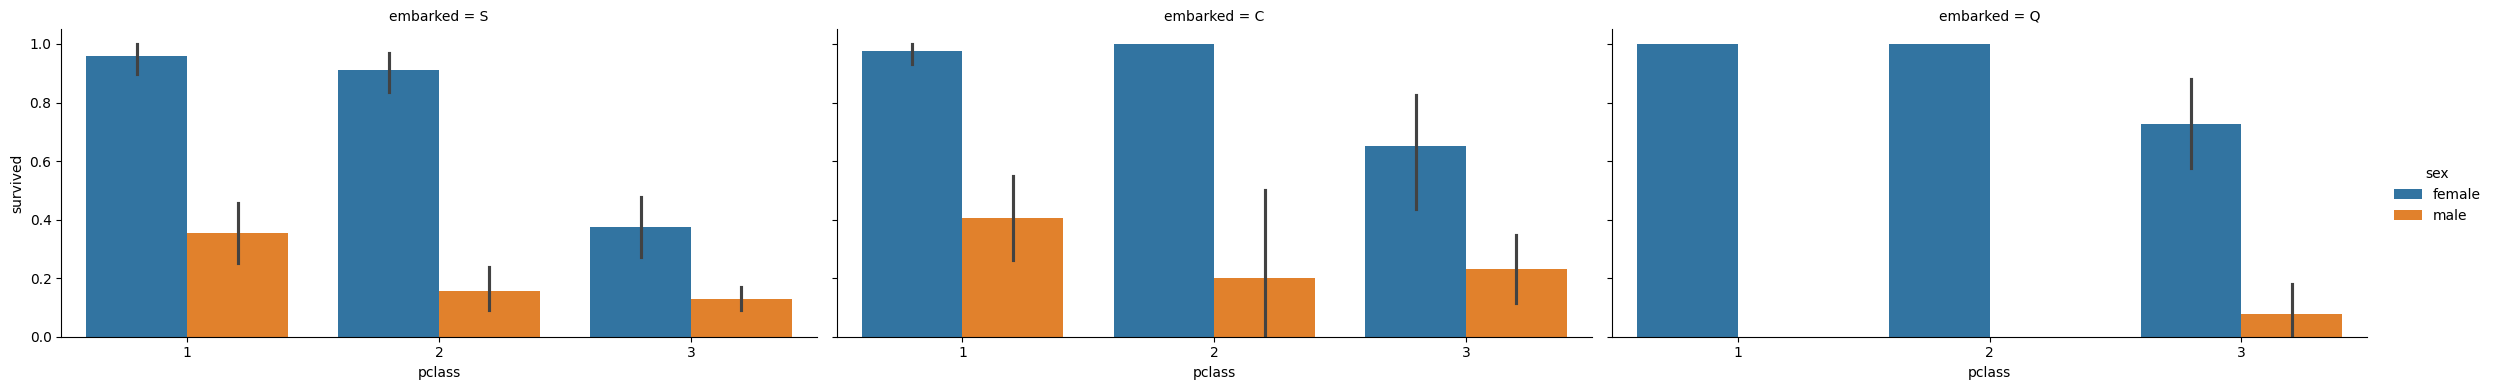

In [ ]:
sns.catplot(x='pclass', y='survived', hue='sex', col='embarked',kind = 'bar' ,height=4, aspect=2, data=df)

##"embarked" kısmına bağlı olarak hayatta kalma oranı

In [ ]:
df.embarked.value_counts()

,count
embarked,
S,644
C,168
Q,77


In [ ]:
df.groupby('embarked').survived.value_counts()


embarked  survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: count, dtype: int64

In [ ]:
df[['embarked', 'survived']].groupby(['embarked'], as_index=False).mean()


,embarked,survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


<Axes: xlabel='embarked', ylabel='survived'>

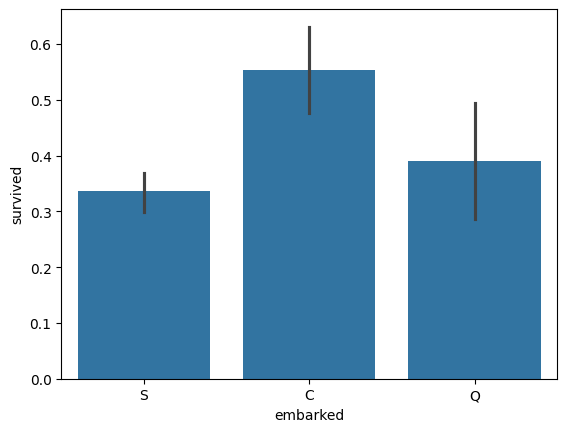

In [ ]:
sns.barplot(x='embarked', y='survived', data=df)

##"parch" kısmına bağlı olarak hayatta kalma oranı

In [ ]:
df.parch.value_counts()

,count
parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


In [ ]:
df.groupby('parch').survived.value_counts()

parch  survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: count, dtype: int64

In [ ]:
df[['parch', 'survived']].groupby(['parch'], as_index=False).mean()

,parch,survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


<ipython-input-71-0139bf809f94>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='parch', y='survived', ci=None, data=df)


<Axes: xlabel='parch', ylabel='survived'>

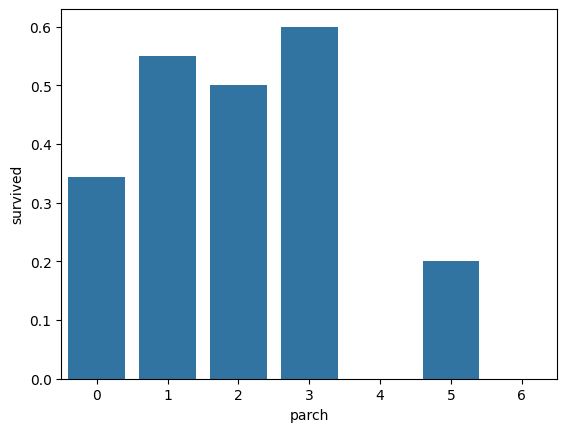

In [ ]:
sns.barplot(x='parch', y='survived', ci=None, data=df)

## "sibsp" kısmına bağlı olarak kurtulma oranları

In [ ]:
df.sibsp.value_counts()

,count
sibsp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


In [ ]:
df.groupby('sibsp').survived.value_counts()

sibsp  survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: count, dtype: int64

In [ ]:
df[['sibsp', 'survived']].groupby(['sibsp'], as_index=False).mean()

,sibsp,survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


<ipython-input-77-40d62d011757>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sibsp', y='survived', ci=None, data=df)


<Axes: xlabel='sibsp', ylabel='survived'>

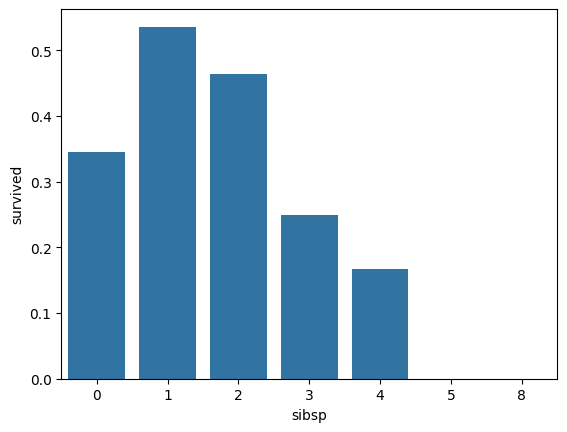

In [ ]:
sns.barplot(x='sibsp', y='survived', ci=None, data=df)

## "age" kısmına bağlı olarak hayatta kalma oranları

In [ ]:
import matplotlib.pyplot as plt

<Axes: xlabel='sex', ylabel='age'>

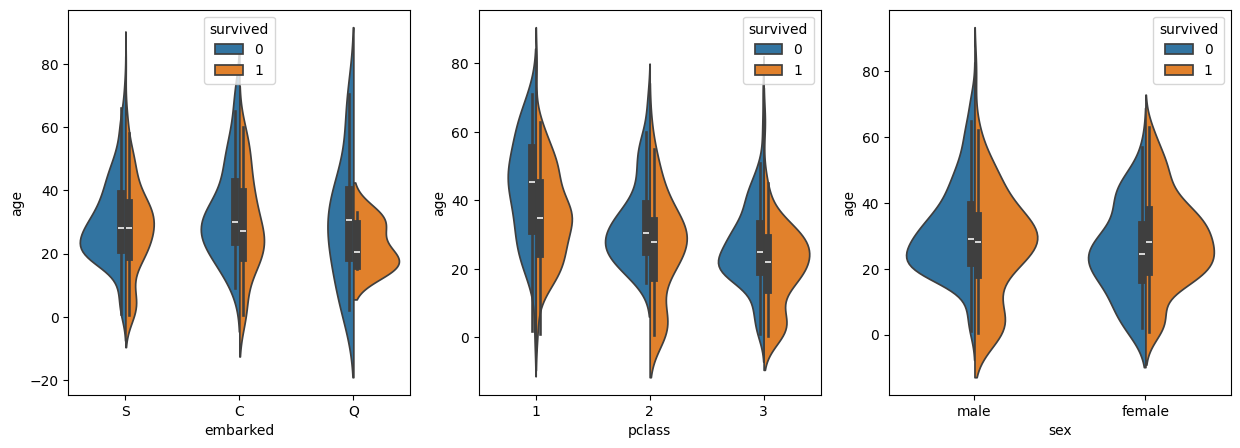

In [ ]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x="embarked", y="age", hue="survived", data=df, split=True, ax=ax1)
sns.violinplot(x="pclass", y="age", hue="survived", data=df, split=True, ax=ax2)
sns.violinplot(x="sex", y="age", hue="survived", data=df, split=True, ax=ax3)

In [ ]:
total_survived = df[df['survived']==1]
total_not_survived = df[df['survived']==0]

male_survived = df[(df['survived']==1) & (df['sex']=="male")]
female_survived = df[(df['survived']==1) & (df['sex']=="female")]

male_not_survived = df[(df['survived']==0) & (df['sex']=="male")]
female_not_survived = df[(df['survived']==0) & (df['sex']=="female")]

<ipython-input-88-3dda55bf97db>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(total_survived['age'].dropna().values, bins=range(0, 81, 1), kde=True, color='blue')
<ipython-input-88-3dda55bf97db>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(total_not_survived['age'].dropna().values, bins=r

<Axes: xlabel='age', ylabel='Density'>

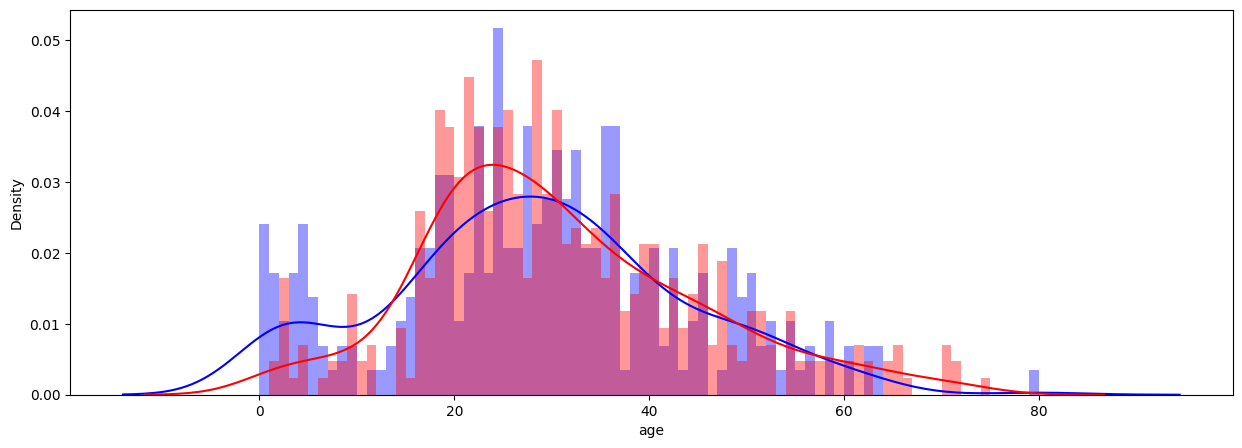

In [ ]:
plt.figure(figsize=[15,5])
plt.subplot(111)
sns.distplot(total_survived['age'].dropna().values, bins=range(0, 81, 1), kde=True, color='blue')
sns.distplot(total_not_survived['age'].dropna().values, bins=range(0, 81, 1), kde=True, color='red', axlabel='age')

<ipython-input-89-7a05e8b7e471>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(female_survived['age'].dropna().values, bins=range(0, 81, 1), kde=True, color='blue')
<ipython-input-89-7a05e8b7e471>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(female_not_survived['age'].dropna().values, bins

<Axes: xlabel='Male Age', ylabel='Density'>

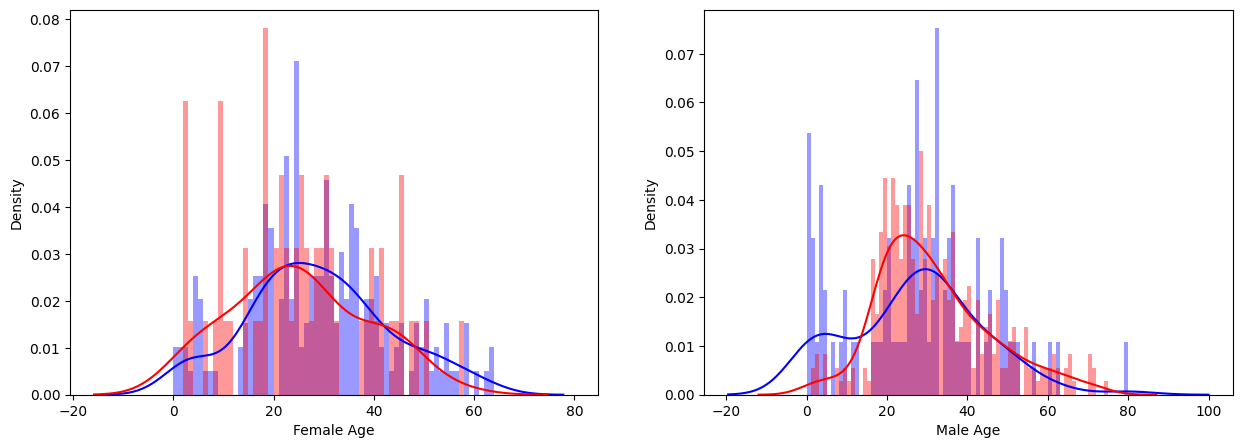

In [ ]:
plt.figure(figsize=[15,5])

plt.subplot(121)
sns.distplot(female_survived['age'].dropna().values, bins=range(0, 81, 1), kde=True, color='blue')
sns.distplot(female_not_survived['age'].dropna().values, bins=range(0, 81, 1), kde=True, color='red', axlabel='Female Age')

plt.subplot(122)
sns.distplot(male_survived['age'].dropna().values, bins=range(0, 81, 1), kde=True, color='blue')
sns.distplot(male_not_survived['age'].dropna().values, bins=range(0, 81, 1), kde=True, color='red', axlabel='Male Age')

##"class" kısmına bağlı olarak hayatta kalma oranı

In [ ]:
df.groupby('class').survived.value_counts()

<ipython-input-90-108790859128>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('class').survived.value_counts()


class   survived
First   1           136
        0            80
Second  0            97
        1            87
Third   0           372
        1           119
Name: count, dtype: int64

In [ ]:
df[['class', 'survived']].groupby(['class'], as_index=False).mean()

<ipython-input-91-e6069830873c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[['class', 'survived']].groupby(['class'], as_index=False).mean()


,class,survived
0,First,0.629630
1,Second,0.472826
2,Third,0.242363


<ipython-input-92-69f7b881539e>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='class', y='survived', ci=None, data=df)


<Axes: xlabel='class', ylabel='survived'>

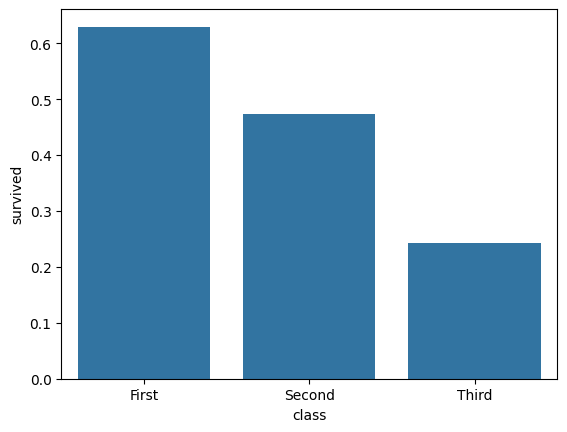

In [ ]:
sns.barplot(x='class', y='survived', ci=None, data=df)

<Axes: xlabel='class'>

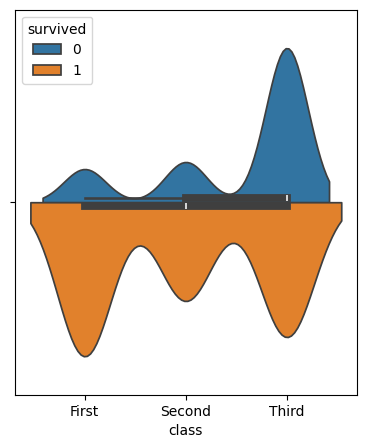

In [ ]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
sns.violinplot(x="class", hue="survived", data=df, split=True, ax=ax1)